In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import h5py
import pandas as pd
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

In [4]:
## OPENING THE DATA SETS via Google Drive
with open('/content/drive/MyDrive/datasets/x_validate.pickle', 'rb') as handle:
    x_validate = pickle.load(handle)

with open('/content/drive/MyDrive/datasets/x_test.pickle', 'rb') as handle:
    x_test = pickle.load(handle)

with open('/content/drive/MyDrive/datasets/x_train.pickle', 'rb') as handle:
    x_train = pickle.load(handle)

with open('/content/drive/MyDrive/datasets/validate.pickle', 'rb') as handle:
    validate = pickle.load(handle)

with open('/content/drive/MyDrive/datasets/test.pickle', 'rb') as handle:
    test = pickle.load(handle)

with open('/content/drive/MyDrive/datasets/train.pickle', 'rb') as handle:
    train = pickle.load(handle)

##    SAVING THE DATA SETS 
# with open('/content/drive/MyDrive/datasets/validate.pickle', 'wb') as handle:
#     pickle.dump(validate, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/datasets/test.pickle', 'wb') as handle:
#     pickle.dump(test, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/datasets/train.pickle', 'wb') as handle:
#     pickle.dump(train, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# This code is used to declare a Keras tokenizer, and to use the training data set to create its dictionary
# Required for demonstration & front-end usage

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, 
                                                  char_level=False)
myData = []
for byte in train['functionSource'].to_list():
  myData.append(byte.decode("utf-8"))
tokenizer.fit_on_texts(myData)
del(myData)
tokenizer.num_words = 8000    # interchangeable ~8000-11000

In [ ]:
# The following code is to be used for demonstration of a metric which violates CWE-119, located at the 63rd index within the Test dataset

exampleTestTrue = test['functionSource'][63]      
listEg = tokenizer.texts_to_sequences([exampleTestTrue.decode('utf-8')])
listEg = listEg[0] 
x_listEg = tf.keras.preprocessing.sequence.pad_sequences([listEg], 
                                  maxlen=500,
                                  padding='post')
x_listEg = x_listEg[0]
print(x_listEg)
print(type(x_listEg))
x_listEg = np.array([x_listEg])
print("FINAL:" , (model.predict([x_listEg]) > (50/100)).astype("int32")[0][0])

In [ ]:
# Gradio library not pre-installed on Colab, run this to install
!pip install -q gradio

     |████████████████████████████████| 668 kB 8.5 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 211 kB 76.3 MB/s 
     |████████████████████████████████| 255 kB 71.5 MB/s 
     |████████████████████████████████| 1.1 MB 70.7 MB/s 
     |████████████████████████████████| 2.0 MB 63.8 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 94 kB 912 kB/s 
     |████████████████████████████████| 144 kB 87.8 MB/s 
     |████████████████████████████████| 271 kB 90.0 MB/s 
     |████████████████████████████████| 10.9 MB 77.5 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 3.6 MB 89.3 MB/s 
     |████████████████████████████████| 61 kB 547 kB/s 
     |████████████████████████

In [ ]:
# Importing each model from hdf5 files on Google Drive

model1 = tf.keras.models.load_model("/content/drive/MyDrive/model-col-1.hdf5")
model2 = tf.keras.models.load_model("/content/drive/MyDrive/model-col-2.hdf5")
model3 = tf.keras.models.load_model("/content/drive/MyDrive/model-col-3.hdf5")

In [ ]:
# This cells calls the Gradio interface and deploys a front-end when run 

import gradio as gr

def gradioBridge(certainty, function):
  predictions = modPredict(certainty, function)
  output = ""
  output = output + "CWE-119: " + str(predictions[0] == 1) + "! Improper Restriction of Operations within the Bounds of a Memory Buffer\n"
  output = output + "CWE-120: " + str(predictions[1] == 1) + "! Buffer Copy without Checking Size of Input\n"
  output = output + "CWE-469: " + str(predictions[2] == 1) + "! Use of Pointer Subtraction to Determine Size\n"
  return output
  

def modPredict(certainty, function):
  certainty = certainty/100
  function = tokenizer.texts_to_sequences([function])
  function = function[0] 
  x_function = tf.keras.preprocessing.sequence.pad_sequences([function], 
                                    maxlen=500,
                                    padding='post')
  x_function = x_function[0]
  x_function = np.array([x_function])
  return ((model1.predict([x_function]) > certainty).astype("int32")[0][0],
          (model2.predict([x_function]) > certainty).astype("int32")[0][0],
          (model3.predict([x_function]) > certainty).astype("int32")[0][0])

gr.Interface(
    fn = gradioBridge,
    inputs=[
            gr.inputs.Slider(30,70, step=5, default=50, label="Model Certainty (%)"),
            gr.inputs.Textbox(type="str", default = "", label="Insert function", lines=20)
    ],
    outputs="text",
    title="Source Code Analyser",
    allow_flagging="never"
).launch(debug=True)


In [5]:
# Load individual models with this cell 
model = tf.keras.models.load_model("/content/drive/MyDrive/model-col-1.hdf5")

In [ ]:
# Keras Model architecture setup 

weights = np.random.normal(size=(10000, 10),scale=0.01)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = 10000,
                                    output_dim = 10,
                                    weights=([weights]),
                                    input_length = 500))

model.add(tf.keras.layers.Convolution1D(filters=128, kernel_size=(9), padding='same'))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool1D(pool_size=4))

model.add(tf.keras.layers.Convolution1D(filters=256, kernel_size=(9), padding='same'))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool1D(pool_size=4))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(lr=0.003)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Load and open TensorBoard via TensorFlow

%load_ext tensorboard
%tensorboard --logdir '/content/drive/MyDrive/project-callback/'

In [ ]:
log_dir = '/content/drive/MyDrive/project-callback/'  
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,write_graph=True, write_images=True)
saveState = '/content/drive/MyDrive/project-callback/model1-at-epoch-{epoch:02d}.hdf5'    # Saves model copy after a specific epoch 
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=saveState, 
                                                      monitor="val_loss",
                                                      save_best_only=True, 
                                                      save_freq='epoch', 
                                                      verbose=1)

In [ ]:
# Training cell
# Change column value for different labels (metrics)
# Verbosity mode 2 to see progress after each epoch

colNo = 1
model.fit(x = x_train,
          y = train.iloc[:,colNo].to_numpy(),
          validation_data = (x_validate, validate.iloc[:,colNo].to_numpy()),
          epochs=30,
          batch_size=256, 
          verbose=2,    
          class_weight= {0: 1., 1: 2.},
          callbacks=[model_checkpoint,tensorboard_callback]   # not necessary, but advised
          )


In [ ]:
# Produce Model Results here

col = 1

y_test = test.iloc[:,col].to_numpy()

predicted = (model.predict(x_test) > 0.5).astype("int32")                                             
confusion = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=predicted)

tn, fp, fn, tp = confusion.ravel()
print('\nTP:',tp); print('FP:',fp); print('TN:',tn); print('FN:',fn)

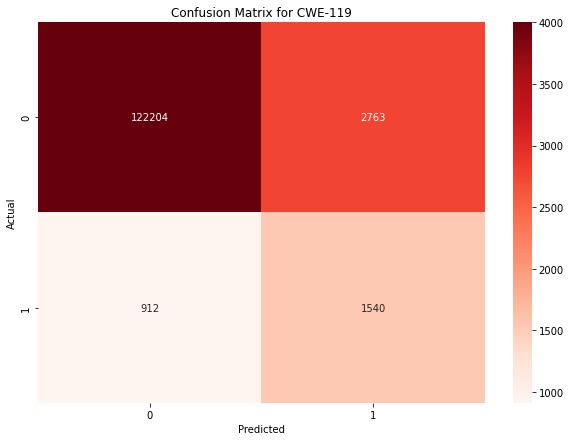

In [ ]:
# COL 1 /// CWE119     
import seaborn as sns
matrix_df = pd.DataFrame(confusion)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, cmap='Reds', fmt='g', vmax=4000)
plt.title('Confusion Matrix for CWE-119')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

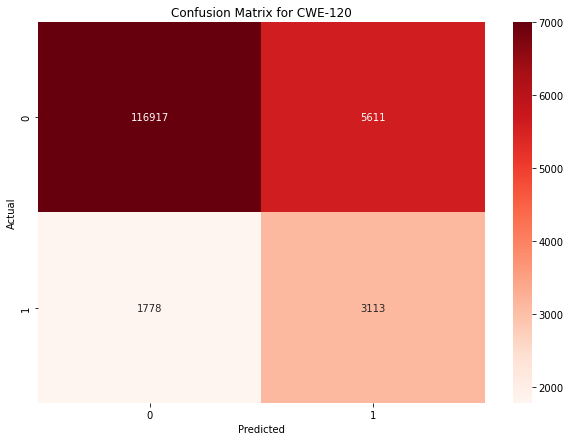

In [ ]:
# COL2 /// CWE120 

import seaborn as sns
matrix_df = pd.DataFrame(confusion)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, cmap='Reds', fmt='g', vmax=7000)
plt.title('Confusion Matrix for CWE-120')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

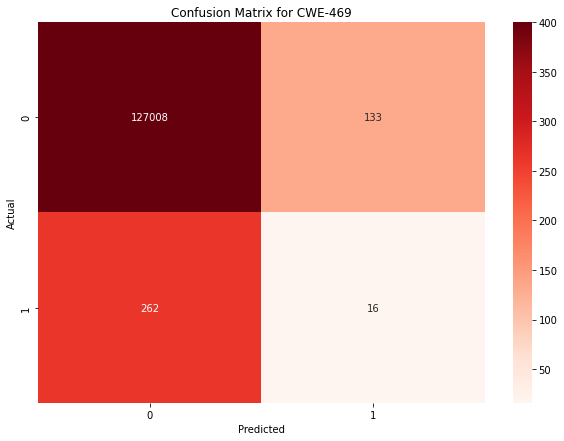

In [ ]:
# COL 3 /// CWE469      

import seaborn as sns
matrix_df = pd.DataFrame(confusion)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, cmap='Reds', fmt='g', vmax=400)
plt.title('Confusion Matrix for CWE-469')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

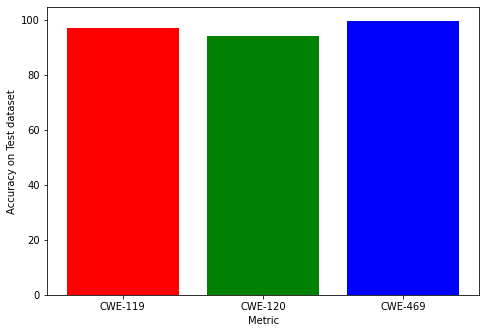

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Accuracy on Test dataset")
ax.set_xlabel("Metric")
metrics = ['CWE-119', 'CWE-120', 'CWE-469']
scores = [97.1, 94.2, 99.7]
ax.bar(metrics, scores, color=['red', 'green', 'blue'])
plt.show()

In [ ]:
# This cell was used to find False Positives in the test data set.
# Warning - use incrementally, crashes likely.
x = 0
while x < 120000:
  if test['CWE-119'][x] == 0:
    function = test['functionSource'][x].decode('utf-8')
    function = tokenizer.texts_to_sequences([function])
    function = function[0] 
    x_function = tf.keras.preprocessing.sequence.pad_sequences([function], 
                                        maxlen=500,
                                        padding='post')
    x_function = x_function[0]
    x_function = np.array([x_function])
    if(model.predict([x_function]) > 0.5).astype("int32")[0][0] == 1:
      print(x)
      break
  x+=1

In [ ]:
# This cell prints decoded functions found in the testing dataset
print(test['functionSource'][63].decode('utf-8'))

get_nth_ancestor(const char *name, int len,
			    unsigned char *result, int generation)
{
	unsigned char sha1[20];
	int ret = get_sha1_1(name, len, sha1);
	if (ret)
		return ret;

	while (generation--) {
		struct commit *commit = lookup_commit_reference(sha1);

		if (!commit || parse_commit(commit) || !commit->parents)
			return -1;
		hashcpy(sha1, commit->parents->item->object.sha1);
	}
	hashcpy(result, sha1);
	return 0;
}


In [ ]:
# This cell prints model predictions for functions 

index = 72069

function = test['functionSource'][index].decode('utf-8')
function = tokenizer.texts_to_sequences([function])
function = function[0] 
x_function = tf.keras.preprocessing.sequence.pad_sequences([function], 
                                    maxlen=500,
                                    padding='post')
x_function = x_function[0]
x_function = np.array([x_function])
print("Model Prediction:", (model.predict([x_function]) > 0.5).astype("int32")[0][0],
      "Actual:", test['CWE-119'][index])
print(test['functionSource'][index].decode('utf-8'))

In [ ]:
# This cell was used to identify all labelled vulnerabilities for Cols 1 & 2
# Cols 1 and 2 (CWE 119 & 120) had the most examples 
indicesCol1 = []
indicesCol2 = []

positiveLabels = []
index = 0
for _ in range(50000):
  if test['CWE-119'][index] == 1:
    indicesCol1.append(index)
  if test['CWE-120'][index] == 1:
    indicesCol2.append(index)
  index+=1
print("CWE-119", indicesCol1)
print("CWE-120", indicesCol2)

CWE-119 [49, 63, 103, 108, 132, 143, 192, 228, 333, 364, 546, 547, 678, 679, 682, 743, 894, 937, 1030, 1051, 1055, 1100, 1128, 1253, 1292, 1339, 1430, 1442, 1475, 1490, 1534, 1566, 1567, 1589, 1602, 1625, 1693, 1749, 1770, 1771, 1775, 1789, 1793, 1821, 1868, 1906, 2074, 2096, 2160, 2184, 2326, 2357, 2520, 2533, 2569, 2584, 2594, 2675, 2682, 2706, 2708, 2716, 2718, 2727, 2772, 2821, 2872, 3006, 3023, 3025, 3045, 3087, 3299, 3335, 3352, 3389, 3406, 3523, 3540, 3636, 3664, 3790, 3818, 4085, 4088, 4115, 4126, 4218, 4280, 4341, 4431, 4492, 4495, 4497, 4511, 4521, 4526, 4543, 4764, 4789, 4865, 4994, 5004, 5027, 5045, 5068, 5069, 5113, 5124, 5195, 5214, 5225, 5242, 5469, 5494, 5501, 5523, 5555, 5558, 5604, 5621, 5712, 5802, 5857, 5914, 6008, 6282, 6405, 6431, 6504, 6548, 6607, 6620, 6675, 6755, 6756, 6870, 6903, 6942, 7009, 7096, 7113, 7175, 7196, 7239, 7272, 7318, 7503, 7519, 7660, 7750, 7779, 7925, 8029, 8050, 8145, 8278, 8299, 8302, 8335, 8377, 8459, 8478, 8538, 8654, 8734, 8797, 8826, 892